In [2]:
import json
from streamio import jsonstream
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\kprat\Anaconda3\envs\py27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
features=['hour_of_the_day','retweetcount','follower_count','influence_level','replies','ranking_score','impressions','favorite_count','tweet_count']
files=['gopatriots','gohawks','patriots','nfl','sb49','superbowl']

Result summary for  gopatriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     284.2
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          1.77e-176
Time:                        10:41:55   Log-Likelihood:                -2816.0
No. Observations:                 446   AIC:                             5650.
Df Residuals:                     437   BIC:                             5687.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1022

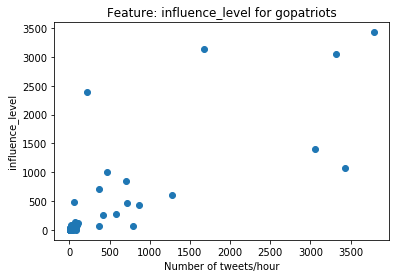

198.105902059
ranking_score


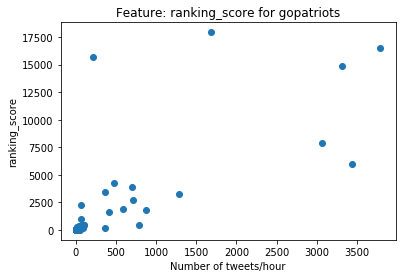

1405.03574012
tweet_count


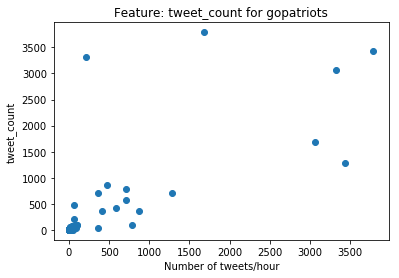

224.810971917
Result summary for  gohawks
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          1.97e-120
Time:                        10:41:57   Log-Likelihood:                -4645.1
No. Observations:                 571   AIC:                             9308.
Df Residuals:                     562   BIC:                             9347.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1        

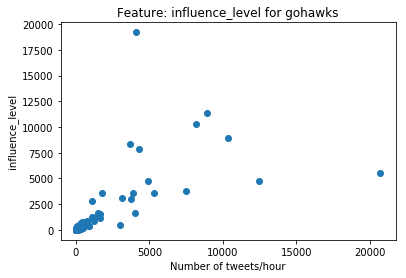

1031.69714124
ranking_score


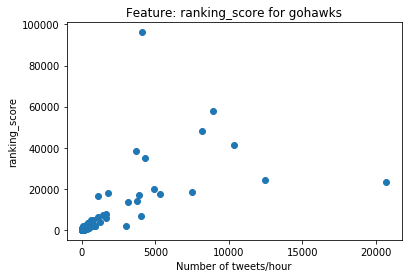

5538.85573936
tweet_count


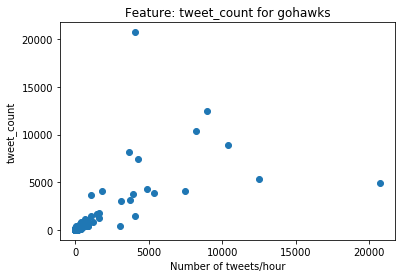

1086.0077559
Result summary for  patriots
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     162.1
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          1.14e-151
Time:                        10:42:01   Log-Likelihood:                -5388.0
No. Observations:                 586   AIC:                         1.079e+04
Df Residuals:                     577   BIC:                         1.083e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1        

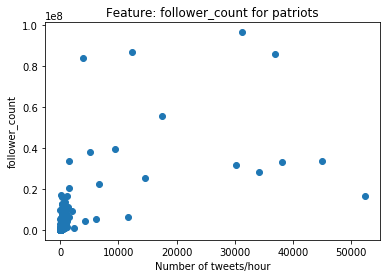

9158331.74179
impressions


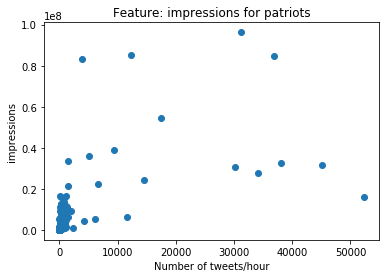

9077783.73055
tweet_count


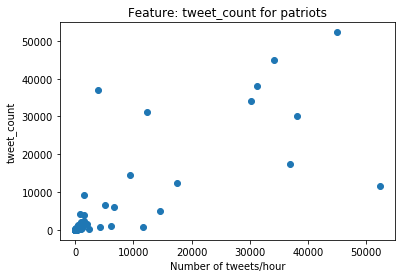

2664.57641429
Result summary for  nfl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     206.7
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          1.58e-173
Time:                        10:42:04   Log-Likelihood:                -4418.8
No. Observations:                 582   AIC:                             8856.
Df Residuals:                     573   BIC:                             8895.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            

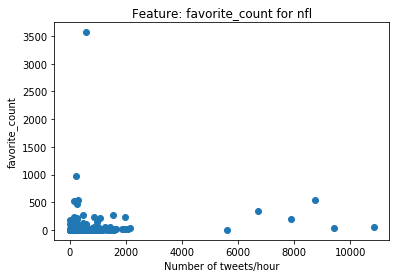

975.65300892
tweet_count


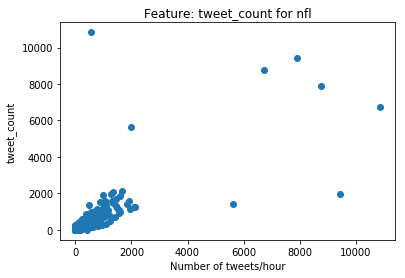

632.998718804
influence_level


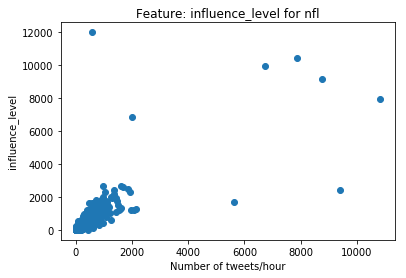

696.683783229
Result summary for  sb49
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     271.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          2.72e-192
Time:                        10:42:10   Log-Likelihood:                -5306.5
No. Observations:                 540   AIC:                         1.063e+04
Df Residuals:                     531   BIC:                         1.067e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           

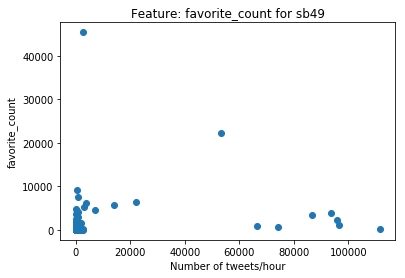

10389.508021
retweetcount


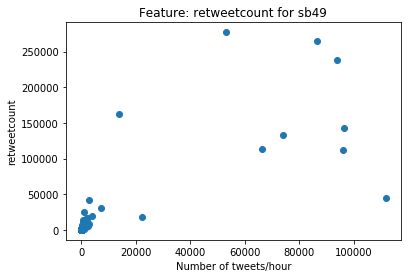

16241.7669106
follower_count


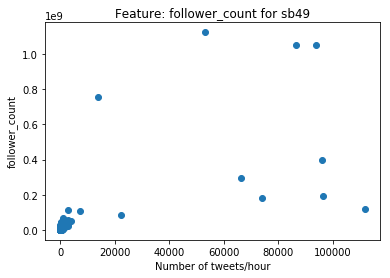

91206456.7345
Result summary for  superbowl
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     348.6
Date:                Sat, 17 Mar 2018   Prob (F-statistic):          9.77e-227
Time:                        10:42:19   Log-Likelihood:                -6032.2
No. Observations:                 586   AIC:                         1.208e+04
Df Residuals:                     577   BIC:                         1.212e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1      

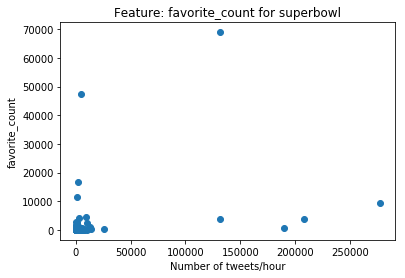

17195.9172194
influence_level


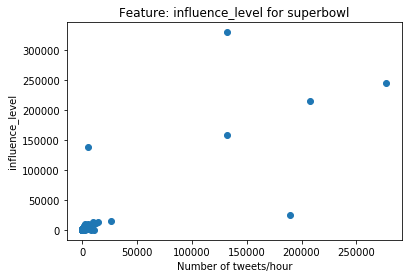

12108.6834346
tweet_count


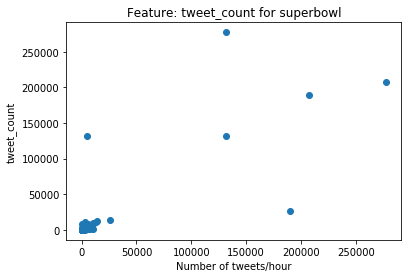

10908.6848701


In [16]:
for f in files:
    filename=f+'.csv'
    n=pd.read_csv(filename)
    n.fillna(0)
    temp=n
    temp['citation_date']=n['citation_date']//60//60
    a=temp.groupby(['citation_date','hour_of_the_day'])['retweetcount','follower_count','influence_level','replies','ranking_score','impressions','favorite_count','tweet_count'].sum()
    a=a.reset_index()
    
    #Performing Linear Regression
    x_data=np.array(a.iloc[:,1:])
    y_data=np.array(a.iloc[:,9])
    x_data=np.nan_to_num(x_data)
    x_data=x_data[:-1]
    y_data=y_data[1:]
    sm.add_constant(x_data)
    result = sm.OLS(y_data, x_data).fit()
    print "Result summary for ",f
    print result.summary()
    print "RMSE :", sqrt(mean_squared_error(y_data,  result.fittedvalues))
    best = result.pvalues.argsort()[:3]
    print "Best features:"
    
    for index in best:
        print features[index]
        plt.title("Feature: "+features[index]+' for '+f )
        plt.xlabel("Number of tweets/hour")
        plt.ylabel(features[index])
        plt.scatter(y_data, x_data[:, index])
        
        s="plots/Feature_"+features[index]+"_for_"+f
        plt.savefig(s)
        plt.show()
        plt.clf()
        print sqrt(mean_squared_error(y_data,  x_data[:, index]))

In [9]:
result.fittedvalues


133.6223029242043